In [161]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20, 10)

In [162]:
# Reading an image as BGR
img = cv2.imread("./img3.jpg")

# Converting BGR to RGB
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


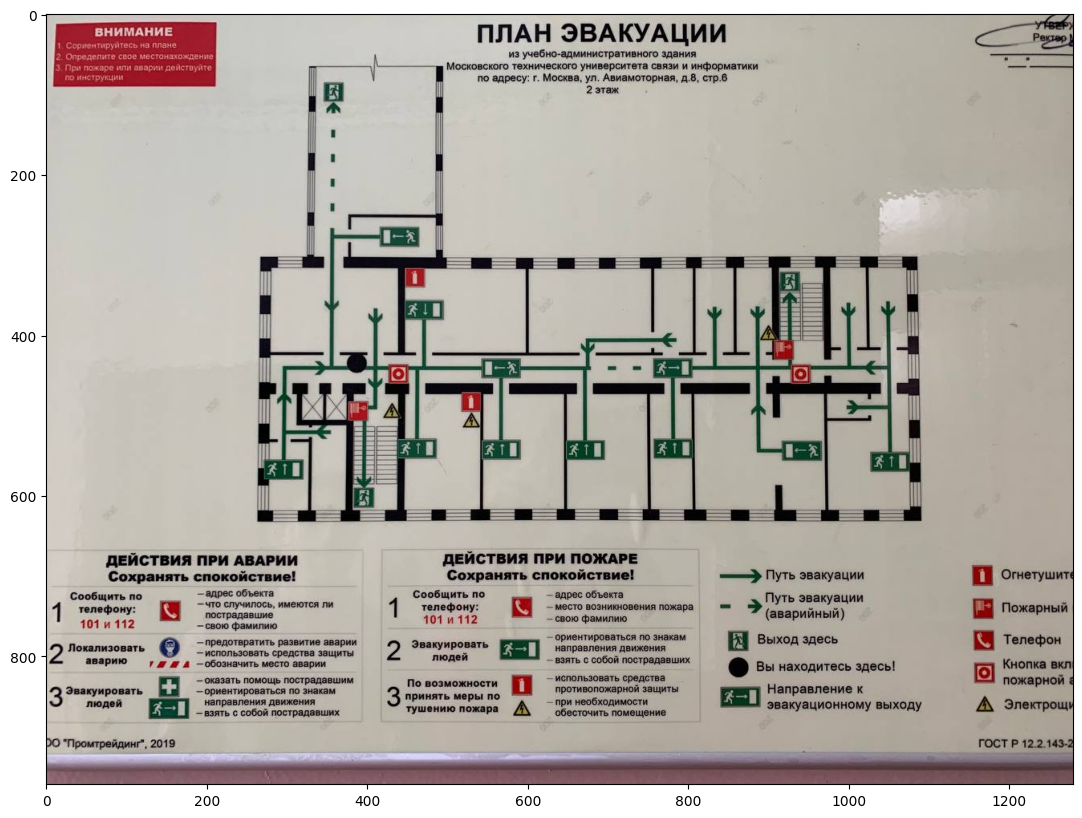

In [163]:
plt.imshow(img_rgb)

In [164]:
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None

    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image

    def dominantColors(self):

        img = self.IMAGE

        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))

        #save image after operations
        self.IMAGE = img

        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)

        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_

        #save labels
        self.LABELS = kmeans.labels_

        #returning after converting to integer from float
        return self.COLORS.astype(int)

clusters = 5
dc = DominantColors(img_rgb, clusters)
colors = dc.dominantColors()
print(colors)

C:\Users\zzhma\PycharmProjects\building-plan-recognition\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[199 196 188]
 [104  53  55]
 [178 172 162]
 [ 15  23  18]
 [123 106 107]]


In [183]:
import colorsys

def differente(x):
  return x[1]>20 and x[1]<225 and x[2]>60

img_hls = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HLS)

dominant_color = colorsys.rgb_to_hls(colors[0][0], colors[0][1],colors[0][2])

for i in range(img_hls.shape[0]):
    for j in range(img_hls.shape[1]):
        if differente(img_hls[i][j]):
            img_hls[i][j] = dominant_color

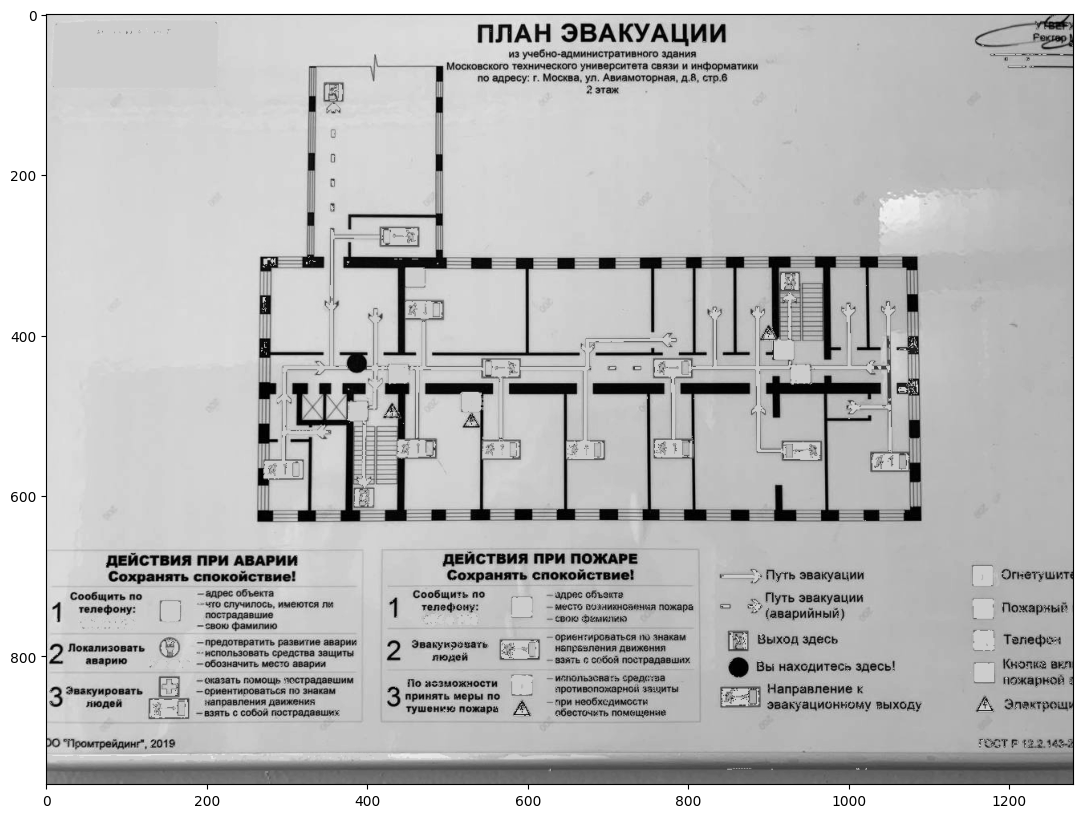

In [184]:
# Converting to grayscale
gray = cv2.cvtColor(cv2.cvtColor(img_hls,cv2.COLOR_HLS2RGB),cv2.COLOR_RGB2GRAY)
# gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

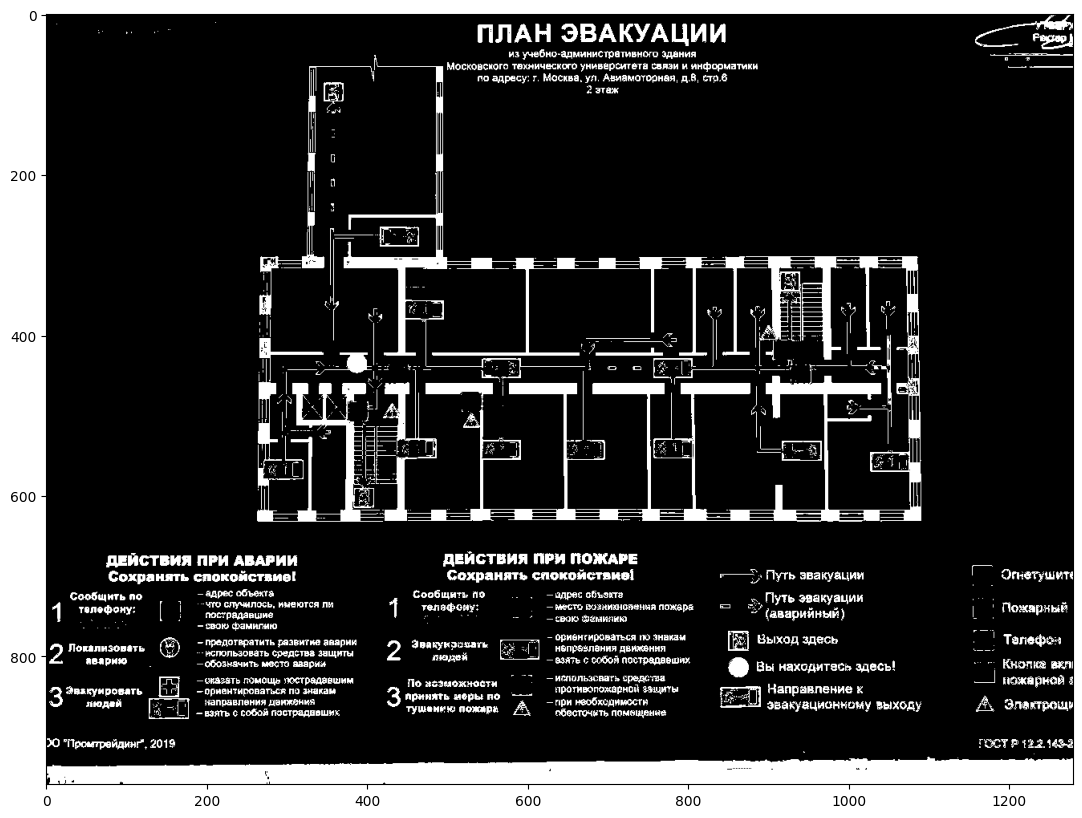

In [185]:
# Applyting OTSU threshold to retrieve the binary mask for contour search
ret,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(otsu,cmap="gray")


In [168]:
cv2.imwrite("binary.png",otsu)

True

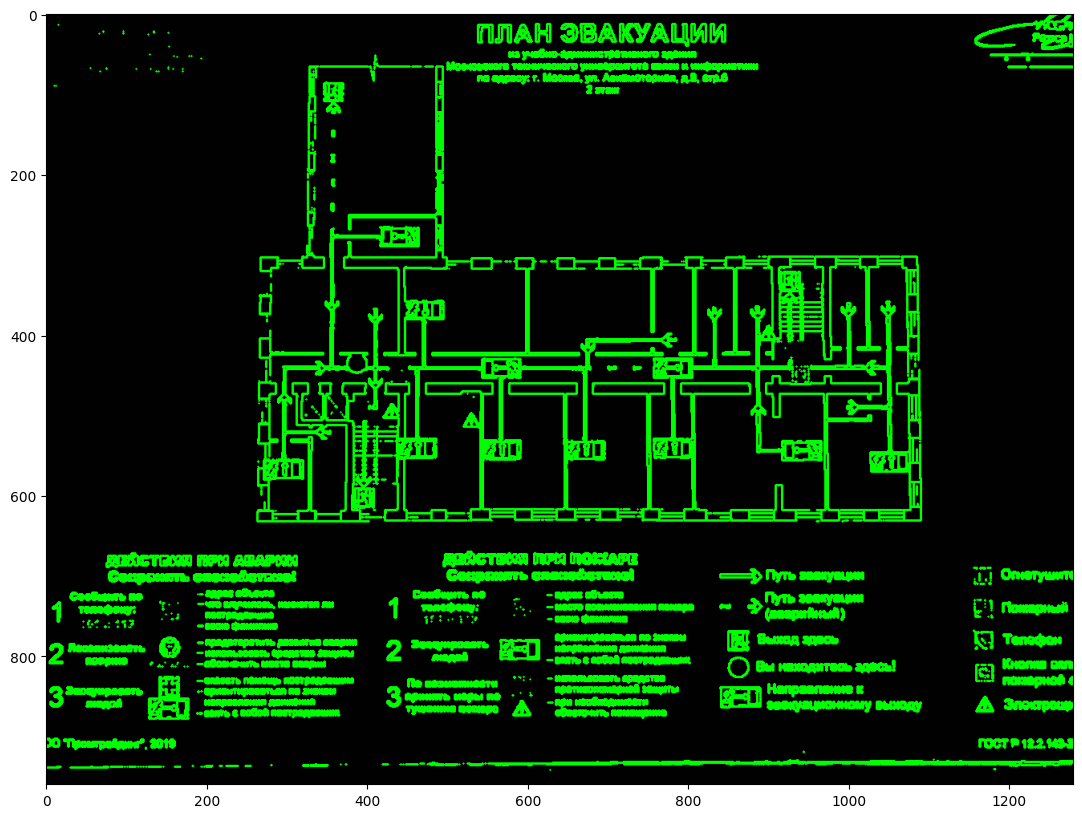

In [169]:
# Finding contours
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Empty img to show found contours
cont_img = np.ones_like(img_rgb)

# Drawing contours
cv2.drawContours(cont_img, contours, -1, (0,255,0), 2)


plt.imshow(cont_img)

In [170]:
#cv2.imwrite("contours.png",cont_img)

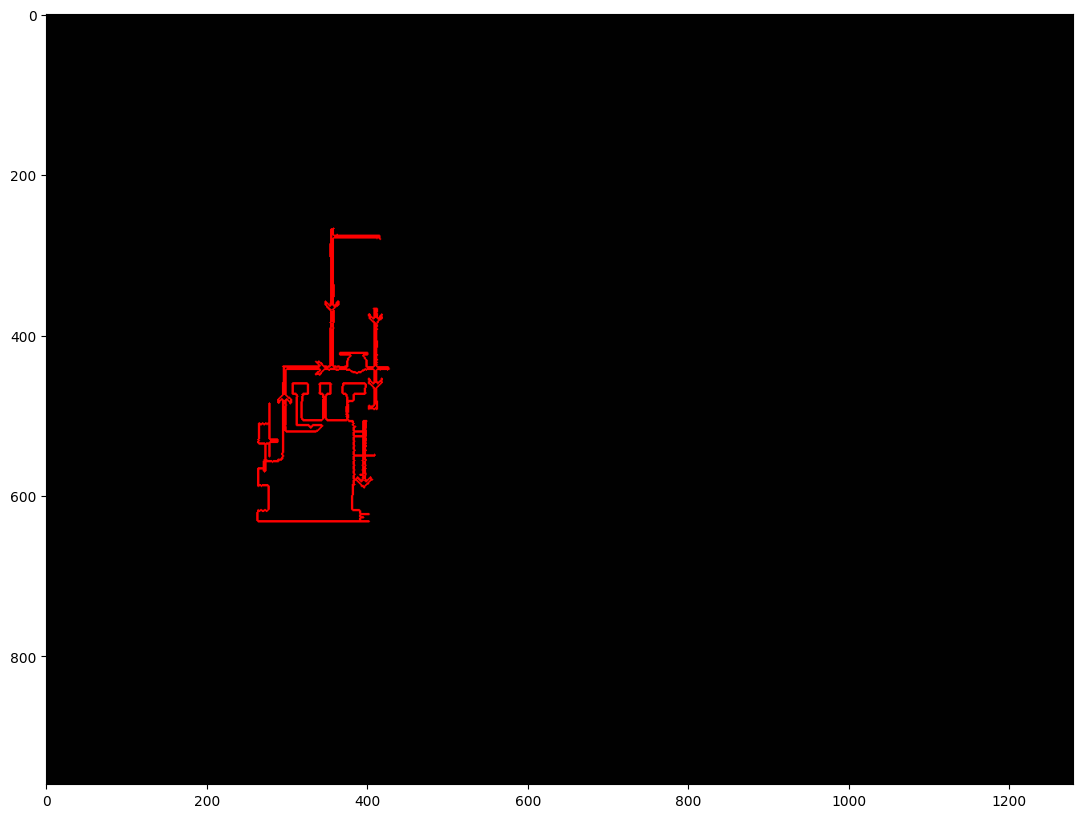

In [171]:
# Finding the largest contour
sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
largest = sorted_contours[0]

# Empty img to show found contours
largest_cont_img = np.ones_like(img_rgb)

# Drawing largest contour
cv2.drawContours(largest_cont_img, largest, -1, (255,0,0), 2)

plt.imshow(largest_cont_img)

In [172]:
cv2.imwrite("largest_contour.png",largest_cont_img)

True

In [173]:
indicies = list(range(len(contours)))
sorted_indicies = sorted(indicies,key=lambda x: cv2.contourArea(contours[x]),reverse=True)
sorted_indicies

[1907,
 1781,
 2102,
 1854,
 1925,
 1667,
 1704,
 1666,
 1847,
 63,
 1845,
 284,
 382,
 1843,
 857,
 1605,
 1937,
 1770,
 1750,
 1900,
 1003,
 1557,
 535,
 2312,
 690,
 2002,
 1768,
 2307,
 1732,
 1779,
 1844,
 2280,
 1470,
 1874,
 1805,
 1909,
 1908,
 1783,
 1842,
 1760,
 1848,
 1841,
 1563,
 1883,
 1462,
 2007,
 2299,
 1489,
 2298,
 2137,
 539,
 2300,
 2305,
 1714,
 1509,
 2301,
 1885,
 1006,
 2293,
 2296,
 2311,
 863,
 72,
 2295,
 233,
 2310,
 302,
 2111,
 291,
 393,
 2304,
 1756,
 1919,
 1945,
 1686,
 2133,
 1683,
 1794,
 1863,
 1612,
 1707,
 920,
 2141,
 2303,
 1974,
 2134,
 1668,
 1669,
 1782,
 2142,
 1944,
 1377,
 1882,
 1881,
 2112,
 289,
 1870,
 1871,
 1611,
 2019,
 1687,
 855,
 1387,
 1860,
 1507,
 1920,
 1708,
 1872,
 864,
 411,
 1793,
 414,
 1681,
 828,
 1785,
 696,
 392,
 1512,
 1754,
 508,
 1952,
 1484,
 137,
 193,
 295,
 1798,
 1851,
 1899,
 1850,
 1360,
 1499,
 717,
 1335,
 722,
 1488,
 235,
 1483,
 1460,
 1481,
 2236,
 547,
 672,
 977,
 1477,
 1504,
 157,
 1469,
 165,


In [174]:
def get_inner_contours(idx,hierarchy):
    inner_first_child = hierarchy[idx][2]

    inner_children = [idx]

    next_child = inner_first_child

    while next_child >= 0:
        inner_children.append(next_child)
        next_child = hierarchy[next_child][0]

    return inner_children

largest_contour_idx = sorted_indicies[0]

print(get_inner_contours(largest_contour_idx,hierarchy[0]))


[1907, 1908, 1909, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934]


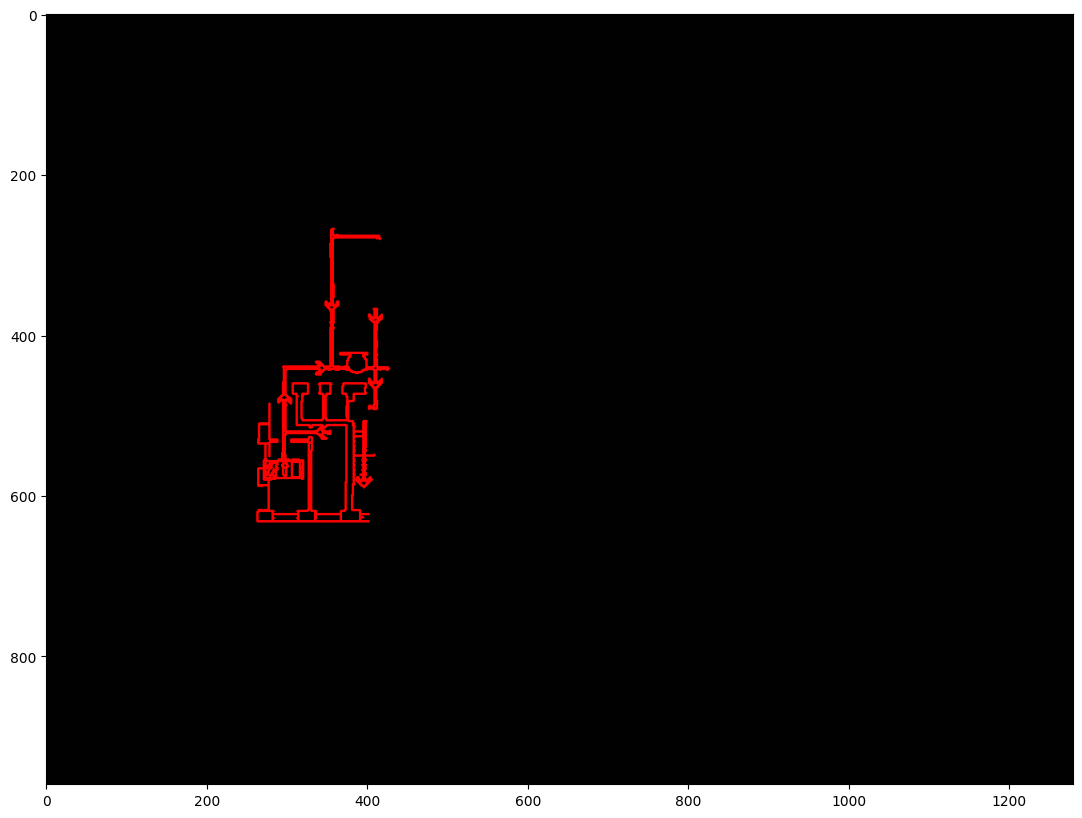

In [175]:
# Empty img to show found contours
largest_cont_img = np.ones_like(img_rgb)

# Drawing largest contour + inner children
cv2.drawContours(largest_cont_img, [contours[i] for i in get_inner_contours(largest_contour_idx,hierarchy[0])], -1, (255,0,0), 2)

plt.imshow(largest_cont_img)

In [176]:
cv2.imwrite("largest_contour_depth1.png",largest_cont_img)

True